<a href="https://colab.research.google.com/github/raisantos/desafio-tecnico/blob/master/desafio_tecnico_rai_soledade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importação das Bibliotecas utilizadas**




In [18]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab Notebooks/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Leitura da primeira aba da planilha**

In [19]:
aba1 = pd.read_excel(root_path+'dados.xlsx', sheet_name=0)
aba1

,Unnamed: 0,Mes_1,Mes_2,Mes_3,Mes_4,Mes_5,Mes_6,Mes_7,Mes_8,Mes_9,Mes_10,Mes_11,Mes_12
0,NaN,janeiro,fevereiro,março,abril,maio,junho,julho,agosto,setembro,outubro,novembro,dezembro
1,Realizado,240,280,200,310,230,213,239,210,210,210,232,213


**Leitura da segunda aba da planilha**

In [20]:
aba2 = pd.read_excel(root_path+'dados.xlsx', sheet_name=1)
aba2

,mês,orcado
0,janeiro,330
1,fevereiro,290
2,março,230
3,abril,321
4,maio,283
5,junho,291
6,julho,193
7,agosto,259
8,setembro,289
9,outubro,230


**Obtendo lista dos valores de REALIZADO da primeira aba do arquivo**

In [21]:
realizado = aba1.iloc[1:].values[0][1:]
realizado

array([240, 280, 200, 310, 230, 213, 239, 210, 210, 210, 232, 213],
      dtype=object)

**Fazendo merge das abas. Adicionando coluna REALIZADO com os valores obtidos anteriormente na aba1 no dataframe da aba2**

In [22]:
aba2['realizado'] = realizado
aba2

,mês,orcado,realizado
0,janeiro,330,240
1,fevereiro,290,280
2,março,230,200
3,abril,321,310
4,maio,283,230
5,junho,291,213
6,julho,193,239
7,agosto,259,210
8,setembro,289,210
9,outubro,230,210


**Adicionando coluna DIFF, com o cálculo da diferença entre as colunas ORÇADO E REALIZADO**

In [23]:
aba2['diff'] = aba2['orcado'] - aba2['realizado']
aba2

,mês,orcado,realizado,diff
0,janeiro,330,240,90
1,fevereiro,290,280,10
2,março,230,200,30
3,abril,321,310,11
4,maio,283,230,53
5,junho,291,213,78
6,julho,193,239,-46
7,agosto,259,210,49
8,setembro,289,210,79
9,outubro,230,210,20


**Salvando arquivo .CSV**

In [0]:
aba2.to_csv(root_path + 'desafio-saida.csv', index=False)

**Obtendo valores das colunas do dataframe aba2 para montagem do gráfico**

In [25]:
meses = aba2['mês'].values
meses

array(['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho', 'julho',
       'agosto', 'setembro', 'outubro', 'novembro', 'dezembro'],
      dtype=object)

In [26]:
realizados = aba2['realizado'].values
realizados

array([240, 280, 200, 310, 230, 213, 239, 210, 210, 210, 232, 213],
      dtype=object)

In [27]:
diff = aba2['diff'].values
diff

array([90, 10, 30, 11, 53, 78, -46, 49, 79, 20, 202, 208], dtype=object)

**Montagem do gráfico relacionando os meses com "orçado x realizado"**

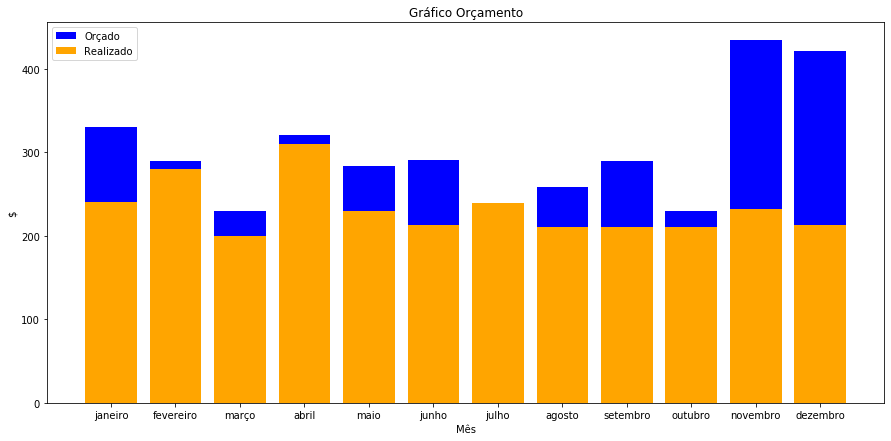

In [28]:
plt.figure(figsize=(15,7))
plt.bar(meses, diff, color='blue', bottom = realizados)
plt.bar(meses, realizados, color='orange')

plt.xlabel('Mês')
plt.ylabel('$')
plt.title('Gráfico Orçamento')
plt.legend(('Orçado', 'Realizado'))
plt.savefig(root_path + 'desafio-grafico.png')